# Exploring the Dynamics of Transportation in Ireland & Abroad🚂

**Name:** 
Stephen Hasson

**Student No:** 
sba23014

**Student Email:**
sba23014@student.cct.ie

**Course:** 
CCT MSC in Data Analytics

**Assignment:**
MSC_DA_CA2

**Year:**
Sept-23 Intake

## Table of Contents

### [Time-Series Forecasting](#time-series-forecasting)
### [Data Understanding Phase & Data Preparation Phase](#data_understanding_phase)
### [Modelling Phase & Evaluation Phase](#modelling_phase)
### [Deplopyment-Phase](#deployment_phase)
***

<a id='time-series-forecasting'></a>
###  Time Series Forecasting
***
*"Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making"* (2023, Tableau)

Below Image Credit (2023, Nguyen)

In [1]:
# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Suppress deprecation warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category = DeprecationWarning)

# Import necessary libraries
from IPython.display import display, HTML

# Image URL
image_url = "https://github.com/sba23014/cct_msc_data_analytics/raw/main/s2_ca1/rnn_example_picture.png"

# Display the image
display(HTML(f'<center><img src = "{image_url}" width = 600 height = 300 /></center>'))

In [2]:
# Import EDA & visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Display all columns of the pandas df
pd.set_option('display.max_columns', None)

# Configure default colour scheme for seaborn
sns.set(color_codes = True)

# Apply the Seaborn Whitegrid style
plt.style.use('seaborn-whitegrid')

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

##  Notebook Requirements

In [3]:
# Export requirements.txt file
# !pip freeze > requirements.txt

For the purpose of enhanced readability, dependency clarity and easier debugging I have centralised all of the Python libraries and default settings used in this analysis at the beginning of my code. I will explain why specific libraries have been used as appropriate as they are utilised in the clode.

I have chosen to remove the default column restrictions with regards to the Pandas DataFrame (df) so that it will be easier to review all of the series in the one cell.

The option to suppress warning messages was applied as a default setting retrospectively once analysis was complete, the rationale for this decision is to help enhance readability by eliminating non-critical alerts and streamlining output display.

I used the below 4 core libraries as my primary libraries for data analysis & visualisation:

* **Pandas** - I used this library as it makes it really easy to load and manipulate structured data through the use of Pandas dataframes & it has a lot of great functions for data cleaning & transformation which allows me to get my data ready for deeper analysis and modelling. 
* **Numpy** - I used this library for it's numerical functions & for it's ability to prepare data in particular for Machine Learning modelling due to the different data structures required for those models such as arrays and matrices. 
* **Matplotlib** - I used this library when I need to plot more low level detailed data visualisation that Seaborn is too high level to provide. It gives me a great level of customisation though generally is more tedious & time consuming to produce effective visualisations than Seaborn. 
* **Seaborn** - I prefer to use Seaborn as it's an easier, more efficient & aesthetically pleasing method for plotting data visualisations when I don't require the deeper level of customisation or detail that some visualisations need.

**References**:
* https://pandas.pydata.org/
* https://numpy.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/

<a id='data_understanding_phase'></a>
##  Data Understanding Phase & Data Preparation Phase

#### Pre-Processed GSK Daily Stock Price Data

In [4]:
# Create variable to store the raw url of cso dataset uploaded to personal github account
df_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_part-00000-ea201b3a-d704-4c4d-9b19-1eba8ce2e065-c000.csv'

# Read file from github url into Pandas DataFrame (df)
df = pd.read_csv(df_url)

# Return first 5 rows to validate 'data' df creation
df.head()

Date      Open      High       Low     Close  Volume  Dividends  \
0  1980-03-28  0.000000  0.149641  0.139201  0.139201    2400        0.0   
1  1980-03-31  0.139201  0.139201  0.139201  0.139201       0        0.0   
2  1980-04-01  0.139201  0.139201  0.139201  0.139201       0        0.0   
3  1980-04-02  0.000000  0.149641  0.139201  0.139201     800        0.0   
4  1980-04-03  0.139201  0.139201  0.139201  0.139201       0        0.0   

   Stock Splits  Year  Month  Day  DailyChange PriceTrend  
0           0.0  1980      3   28     0.139201         Up  
1           0.0  1980      3   31     0.000000       Down  
2           0.0  1980      4    1     0.000000       Down  
3           0.0  1980      4    2     0.139201         Up  
4           0.0  1980      4    3     0.000000       Down

In [5]:
# Generate df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11079 non-null  object 
 1   Open          11079 non-null  float64
 2   High          11079 non-null  float64
 3   Low           11079 non-null  float64
 4   Close         11079 non-null  float64
 5   Volume        11079 non-null  int64  
 6   Dividends     11079 non-null  float64
 7   Stock Splits  11079 non-null  float64
 8   Year          11079 non-null  int64  
 9   Month         11079 non-null  int64  
 10  Day           11079 non-null  int64  
 11  DailyChange   11079 non-null  float64
 12  PriceTrend    11079 non-null  object 
dtypes: float64(7), int64(4), object(2)
memory usage: 1.1+ MB


In [6]:
# Generate descriptive statistics
df.describe()

Open          High           Low         Close        Volume  \
count  11079.000000  11079.000000  11079.000000  11079.000000  1.107900e+04   
mean      15.990020     16.187681     15.962644     16.077199  1.938349e+06   
std       11.896278     11.851240     11.717893     11.785982  1.832171e+06   
min        0.000000      0.114841      0.114841      0.114841  0.000000e+00   
25%        4.326063      4.374434      4.292525      4.341544  7.470500e+05   
50%       17.354406     17.525377     17.200454     17.381336  1.450200e+06   
75%       25.686454     25.868550     25.558481     25.713539  2.581550e+06   
max       43.680000     43.840000     43.480000     43.580002  3.538990e+07   

          Dividends  Stock Splits          Year         Month           Day  \
count  11079.000000  11079.000000  11079.000000  11079.000000  11079.000000   
mean       0.005215      0.000724   2001.686253      6.542016     15.734904   
std        0.052790      0.035723     12.692025      3.430903      8.750387   
min        0.000000      0.000000   1980.000000      1.000000      1.000000   
25%        0.000000      0.000000   1991.000000      4.000000      8.000000   
50%        0.000000      0.000000   2002.000000      7.000000     16.000000   
75%        0.000000      0.000000   2013.000000     10.000000     23.000000   
max        1.252000      2.000000   2024.000000     12.000000     31.000000   

        DailyChange  
count  11079.000000  
mean       0.087180  
std        0.318798  
min       -1.957562  
25%       -0.055856  
50%        0.018224  
75%        0.158265  
max        3.027242

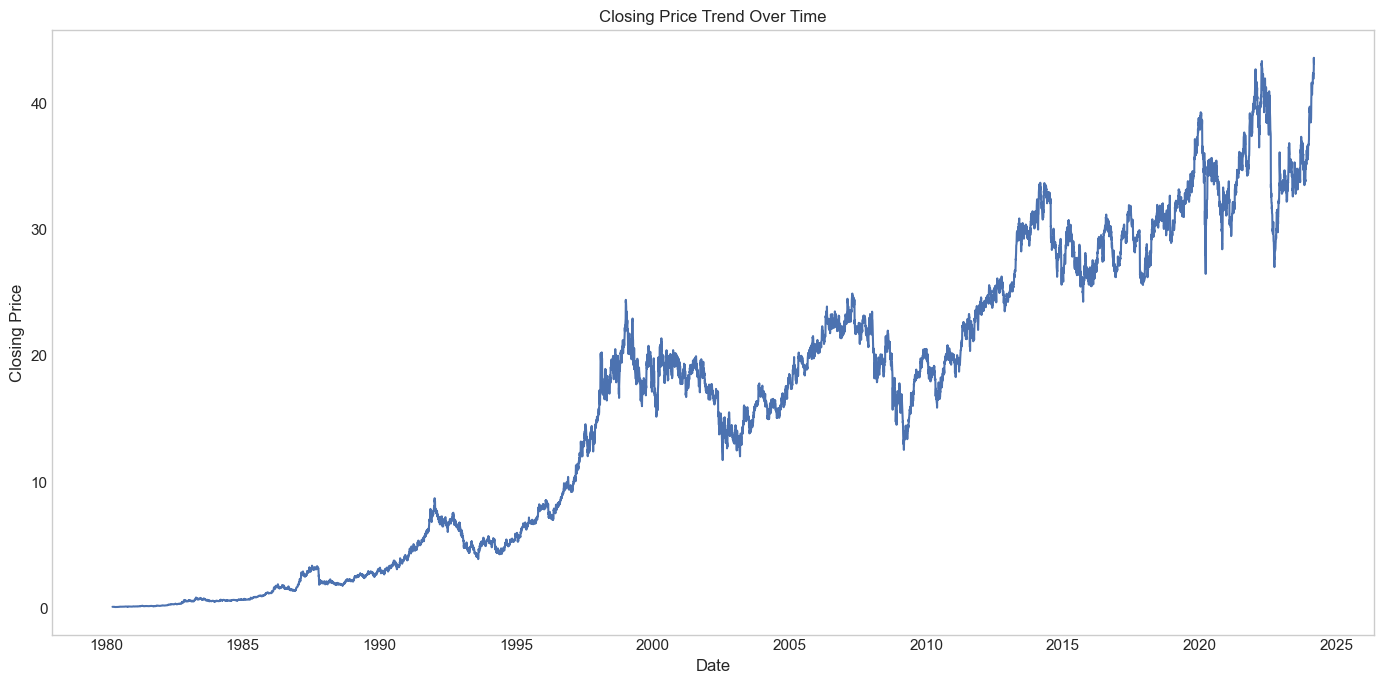

In [7]:
# Convert 'Date' to datetime format for plotting
df['Date'] = pd.to_datetime(df['Date'])

# Line plot for Close price over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=df, color='b')
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Pre-Processed GSK Aggregated Stock Price Data

In [8]:
# Create variable to store the raw url of cso dataset uploaded to personal github account
df_grouped_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_grouped_part-00000-578a57f7-32d7-4116-a2ea-40bdaa806f1e-c000.csv'

# Read file from github url into Pandas DataFrame (df)
df_grouped = pd.read_csv(df_grouped_url)

# Return first 5 rows to validate 'data' df creation
df_grouped.head()

Year  Month  TotalVolume  MaxHigh  MinLow  AvgClose
0  1990      7     35596600     3.86    3.48      3.68
1  1997     11      8155100    14.67   12.73     13.77
2  2022     10    125076700    31.56   28.06     29.47
3  1980      8        42400     0.16    0.14      0.15
4  1987     10     65422000     3.25    1.76      2.56

In [9]:
# Generate df info
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         529 non-null    int64  
 1   Month        529 non-null    int64  
 2   TotalVolume  529 non-null    int64  
 3   MaxHigh      529 non-null    float64
 4   MinLow       529 non-null    float64
 5   AvgClose     529 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 24.9 KB


In [10]:
# Generate descriptive statistics
df_grouped.describe()

Year       Month   TotalVolume     MaxHigh      MinLow  \
count   529.000000  529.000000  5.290000e+02  529.000000  529.000000   
mean   2001.708885    6.493384  4.059540e+07   16.828828   15.361758   
std      12.740948    3.455405  2.984867e+07   12.276267   11.363538   
min    1980.000000    1.000000  2.400000e+03    0.130000    0.110000   
25%    1991.000000    3.000000  1.840280e+07    4.740000    4.050000   
50%    2002.000000    6.000000  3.390780e+07   18.400000   16.370000   
75%    2013.000000    9.000000  5.608960e+07   26.480000   24.890000   
max    2024.000000   12.000000  1.868247e+08   43.840000   41.780000   

         AvgClose  
count  529.000000  
mean    16.112987  
std     11.829311  
min      0.120000  
25%      4.330000  
50%     17.340000  
75%     25.630000  
max     42.730000

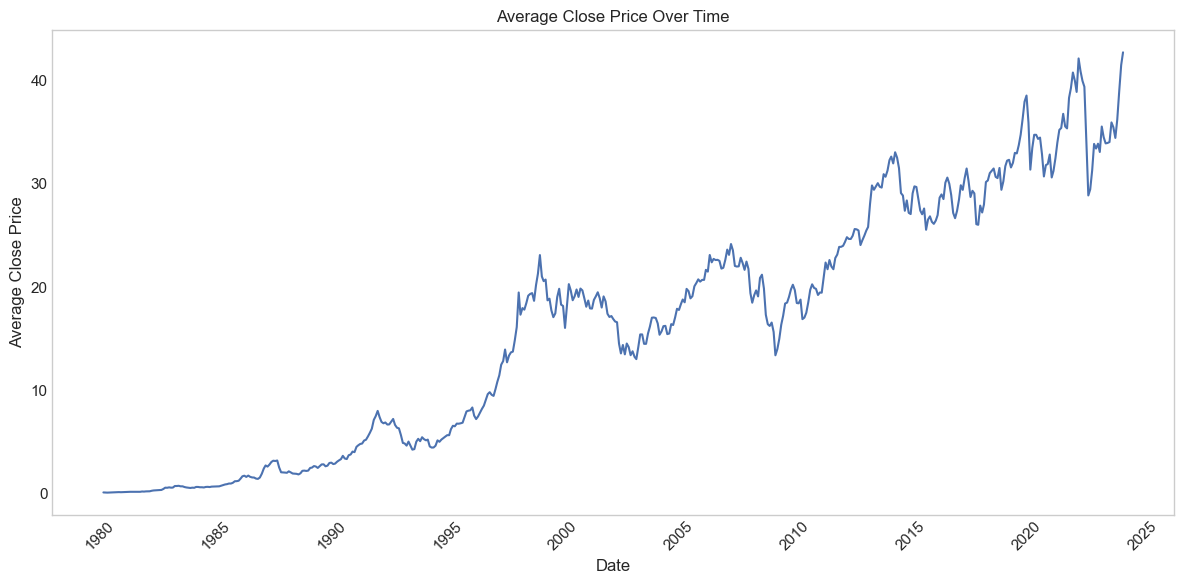

In [11]:
# Create a datetime column for plotting
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(DAY=1))

# Line plot for AvgClose over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AvgClose', data=df_grouped, linestyle='-', color='b')
plt.title('Average Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

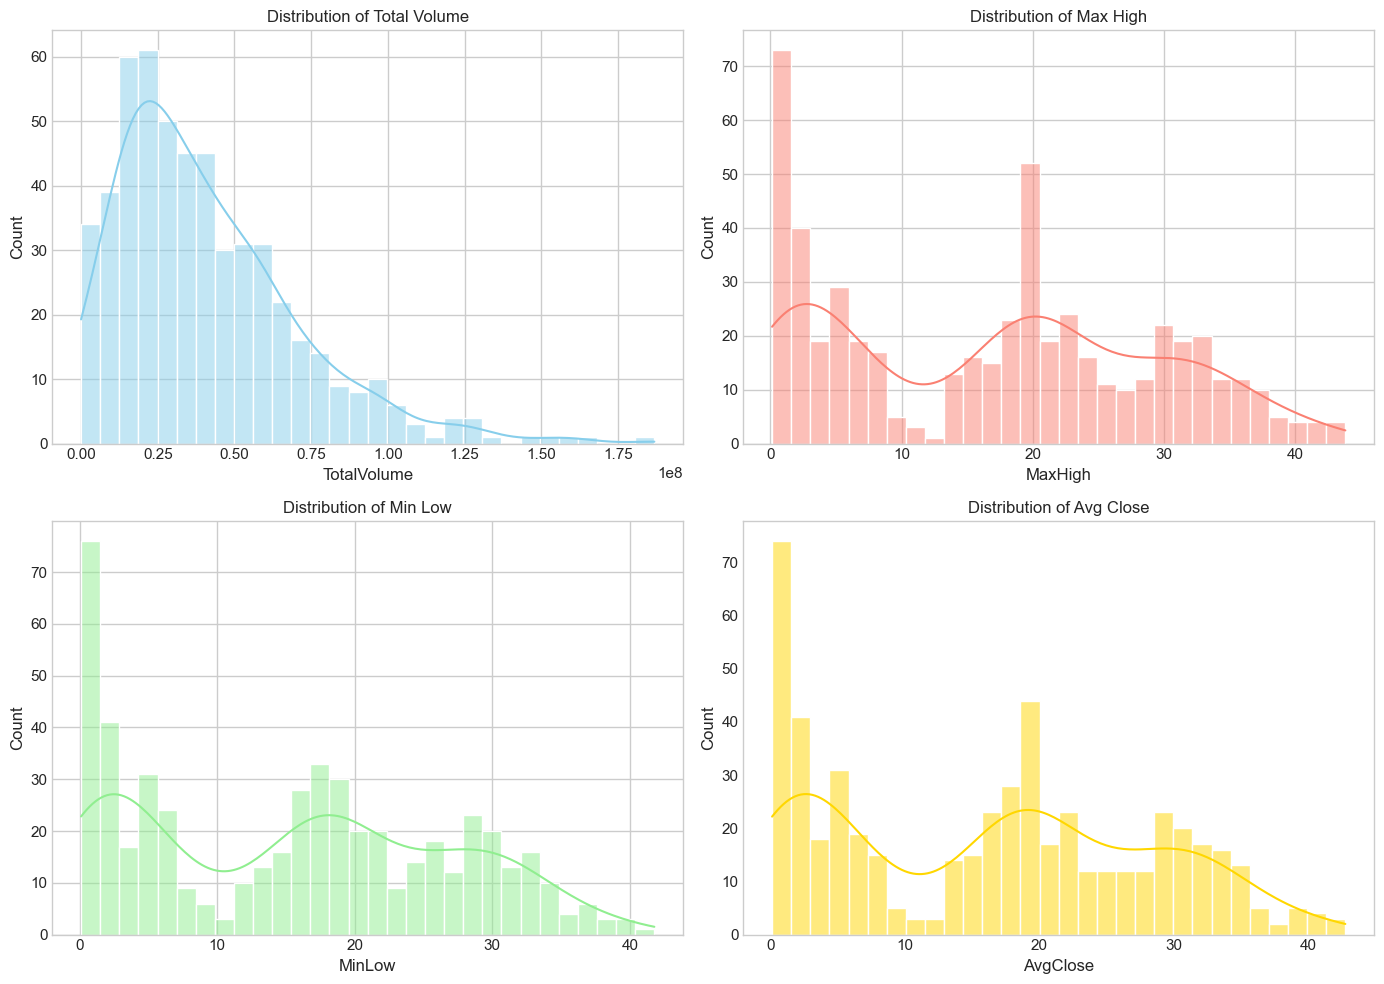

In [12]:
# Histograms for TotalVolume, MaxHigh, MinLow, and AvgClose
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# TotalVolume
sns.histplot(df_grouped['TotalVolume'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Total Volume')

# MaxHigh
sns.histplot(df_grouped['MaxHigh'], bins=30, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Distribution of Max High')

# MinLow
sns.histplot(df_grouped['MinLow'], bins=30, kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Distribution of Min Low')

# AvgClose
sns.histplot(df_grouped['AvgClose'], bins=30, kde=True, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Distribution of Avg Close')

plt.tight_layout()
plt.grid(False)
plt.show()

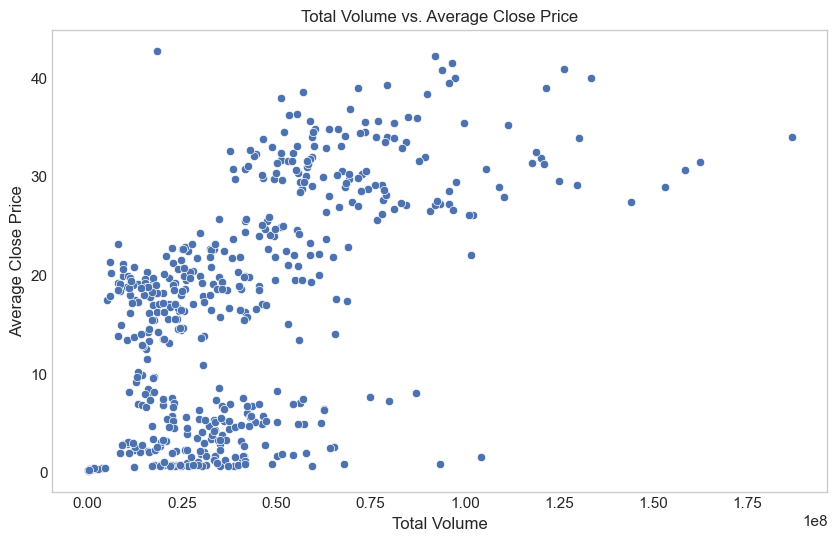

In [13]:
# Scatter plot for TotalVolume vs. AvgClose
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalVolume', y='AvgClose', data=df_grouped, color='b')
plt.title('Total Volume vs. Average Close Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Close Price')
plt.grid(False)
plt.show()

In [14]:
# Calculate the split index for an 80:20 split
#split_index = int(len(df) * 0.8)

# Split the data whilst maintaining the sequence
#training_data = df[:split_index]
#testing_data = df[split_index:]

# Ensure testing_data has 20% of the records
#if len(testing_data) > int(len(df) * 0.2):
#    testing_data = testing_data[:int(len(df) * 0.2)]

In [15]:
# Calculate the split index for the training data
split_index = len(df) - 40

# Split the data whilst maintaining the sequence
training_data = df[:split_index]

In [16]:
# Calculate the split index for the training data
split_index = len(df) - 80

testing_data = df[split_index:]

In [17]:
# Validate length of training & testing df splits
print(f"Training Data Size: {len(training_data)}")
print(f"Testing Data Size: {len(testing_data)}")

Training Data Size: 11039
Testing Data Size: 80


In [18]:
training_data.tail()

Date       Open       High        Low      Close   Volume  \
11034 2024-01-04  38.265946  38.800720  38.256045  38.691784  3474100   
11035 2024-01-05  38.553137  38.929459  38.483815  38.830425  2289100   
11036 2024-01-08  38.909653  39.256264  38.860138  39.256264  2260000   
11037 2024-01-09  39.513751  39.711812  39.375103  39.375103  2967600   
11038 2024-01-10  39.503844  39.662295  39.454329  39.602879  2165200   

       Dividends  Stock Splits  Year  Month  Day  DailyChange PriceTrend  
11034        0.0           0.0  2024      1    4     0.425838         Up  
11035        0.0           0.0  2024      1    5     0.277288         Up  
11036        0.0           0.0  2024      1    8     0.346610         Up  
11037        0.0           0.0  2024      1    9    -0.138648       Down  
11038        0.0           0.0  2024      1   10     0.099034         Up

In [19]:
testing_data.tail()

Date       Open       High        Low      Close   Volume  \
11074 2024-03-04  42.040001  42.439999  42.020000  42.439999  2404300   
11075 2024-03-05  42.630001  42.779999  42.490002  42.599998  2635200   
11076 2024-03-06  42.380001  42.709999  42.330002  42.619999  3247400   
11077 2024-03-07  43.680000  43.840000  43.480000  43.580002  4382300   
11078 2024-03-08  43.020000  43.220001  42.910000  43.139999  3308100   

       Dividends  Stock Splits  Year  Month  Day  DailyChange PriceTrend  
11074        0.0           0.0  2024      3    4     0.399998         Up  
11075        0.0           0.0  2024      3    5    -0.030003       Down  
11076        0.0           0.0  2024      3    6     0.239998         Up  
11077        0.0           0.0  2024      3    7    -0.099998       Down  
11078        0.0           0.0  2024      3    8     0.119999         Up

In [20]:
# Apply the Seaborn Whitegrid style
#plt.style.use('seaborn-whitegrid')

#plt.plot(training_data, color = "b", label = 'Training')
#plt.plot(testing_data, color = "o", label = 'Testing')
#plt.ylabel('GSK Close Price')
#plt.xlabel('Date')
#plt.xticks(rotation = 45)
#plt.grid(False)
#plt.title("Train/Test split for GSK Stock Price Data: 28-Mar-1980 to 08-Mar-2024")
#plt.show()

Training data

In [21]:
training_data = training_data.iloc[:, 4].values

print(training_data)

[ 0.1392013   0.1392013   0.1392013  ... 39.25626373 39.375103
 39.60287857]


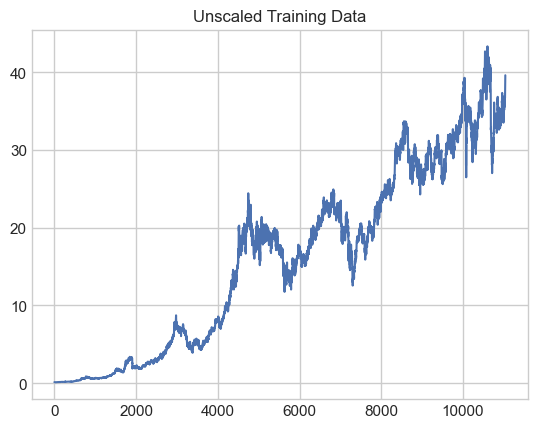

In [22]:
plt.plot(training_data)
plt.title("Unscaled Training Data")
plt.show()

In [23]:
scaler = MinMaxScaler()

In [24]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

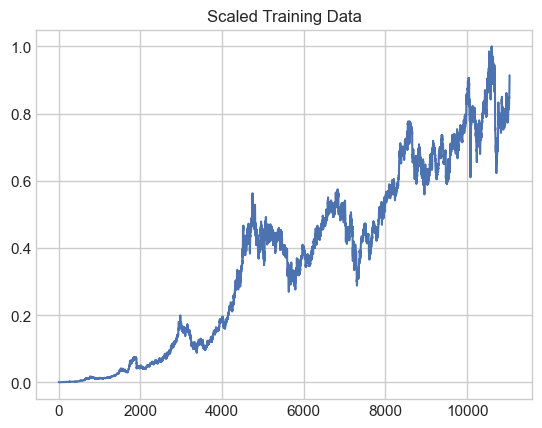

In [25]:
plt.plot(training_data)
plt.title("Scaled Training Data")
plt.show()

Testing data

In [26]:
x_training_data = []
y_training_data =[]

In [27]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [28]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [29]:
print(x_training_data.shape)
print(y_training_data.shape)

(10999, 40)
(10999,)


In [30]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

In [31]:
print(x_training_data.shape)

(10999, 40, 1)


In [32]:
rnn = Sequential()

In [33]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [34]:
rnn.add(Dropout(0.2))

In [35]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))

In [36]:
rnn.add(Dense(units = 1))

In [37]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
rnn.fit(x_training_data, y_training_data, epochs = 1, batch_size = 32)

344/344 [==============================] - 18s 37ms/step - loss: 0.0045


In [39]:
### Come back to this part, need to start the index from 40 values in

testing_data = testing_data[40:].values

In [40]:
testing_data = testing_data.iloc[:, 4].values

print(testing_data)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
plt.plot(testing_data)
plt.title("Unscaled Testing Data")
plt.show()

In [ ]:
testing_data = scaler.transform(training_data.reshape(-1, 1))

In [ ]:
plt.plot(testing_data)
plt.title("Scaled Testing Data")
plt.show()

In [ ]:
final_testing_data = []

for i in range(40, len(testing_data)):

     final_testing_data.append(testing_data[i-40:i, 0])

final_testing_data = np.array(final_testing_data)

In [ ]:
final_testing_data = np.reshape(final_testing_data, (final_testing_data.shape[0], final_testing_data.shape[1],1))

In [ ]:
predictions = rnn.predict(final_testing_data)

In [ ]:
#predictions = rnn.predict(testing_data)

In [ ]:
plt.plot(predictions)

In [ ]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

In [ ]:
unscaled_testing_data = scaler.inverse_transform(testing_data)

plt.plot(unscaled_testing_data)

In [ ]:
# Apply the Seaborn Whitegrid style
plt.style.use('seaborn-whitegrid')

plt.plot(unscaled_predictions, color = 'orange', label = "Predictions")

plt.plot(unscaled_testing_data, color = 'blue', label = "Real Data")

plt.title('Facebook Stock Price Predictions')

plt.legend()

In [ ]:
#print("The first trading day price prediction is: ",unscaled_predictions[0])
#print("The real first trading day price: ",unscaled_testing_data[0])

In [ ]:
#print("The last trading day price prediction: ",unscaled_predictions[])
#print("The real last trading day price: ",unscaled_testing_data[])